In [1]:
from H5Image import *
from pathlib import Path
import matplotlib.pyplot as plt

In [8]:
h5_fpath = Path("beyondRGB/clb/BLUE_blue/1_light1/WT/oppo.h5")
json_fpath = Path("beyondRGB/clb/BLUE_blue/1_light1/WT/oppo_tags.json")

In [9]:
h5_img = H5Image(h5_fpath, json_fpath)

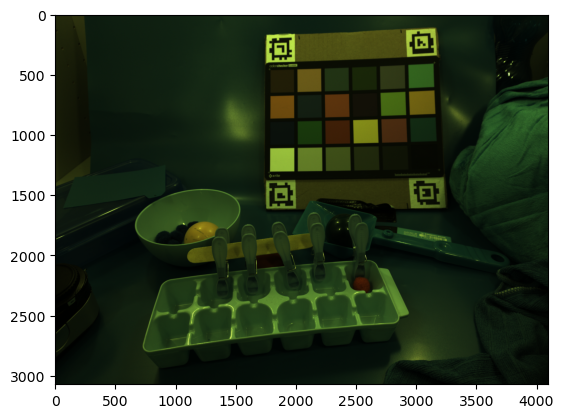

In [10]:
# Visualize image in camera raw space (after demosaicing)
plt.imshow(h5_img.demosaiced_image); plt.show()

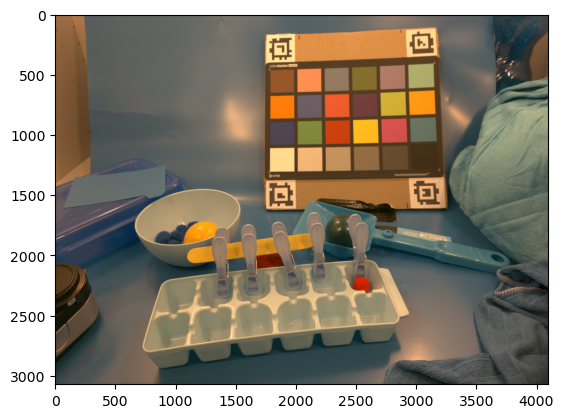

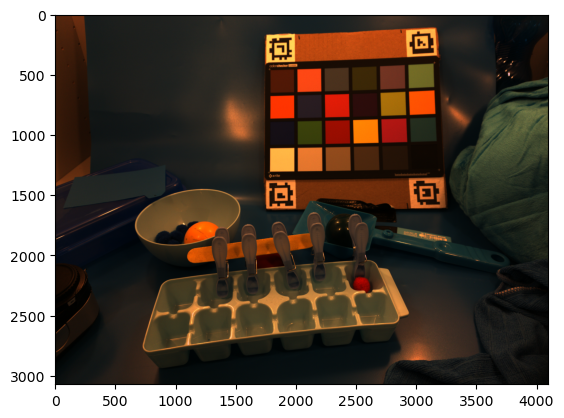

In [11]:
# Use camera's estimated white point for white balance
plt.imshow(h5_img.white_balanced_image); plt.show()
plt.imshow(h5_img.white_balanced_image_linear_RGB); plt.show()

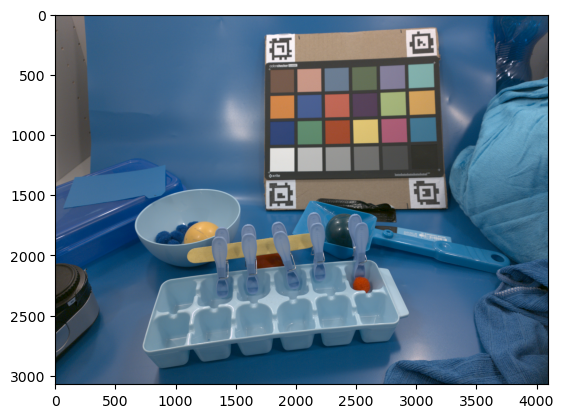

In [13]:
# Apply white balance with the color chart's white patch values (in the camera raw space) as the white point
white_patch_camera_space_median = np.array([ 0.38431373,  0.4862745,   0.15294118])
white_balanced_image = h5_img.apply_external_white_balance_white_patch(white_patch_camera_space_median, apply_gamma=True)
plt.imshow(white_balanced_image); plt.show()

/home/shiraw/anaconda3/envs/sirc-mis/lib/python3.10/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: Correlated colour temperature must be in domain [4000, 25000], unpredictable results may occur!
  warn(*args, **kwargs)


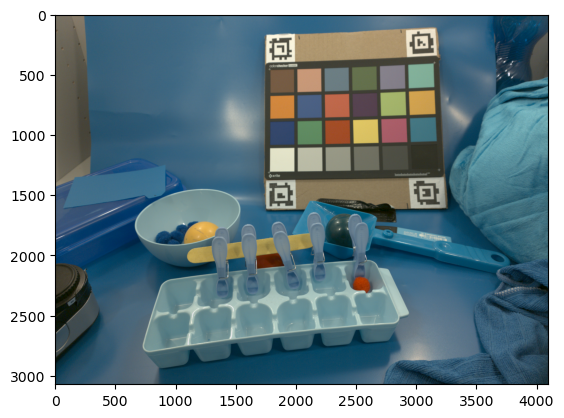

In [14]:
# Apply white balance with the measured illuminant's xy values as the white point
illuminant_xy = np.array([ 0.468222,   0.426679])
white_balanced_image = h5_img.apply_external_white_balance(illuminant_xy, apply_gamma=True)
plt.imshow(white_balanced_image); plt.show()